In [1]:
import sympy
from sympy import sin,cos
from math import pi
import numpy
import matplotlib.pyplot as plt
import scipy.optimize as so

In [2]:
q1,q2,q3,q4,q5 = sympy.symbols('\\theta_1,\\theta_2,\\theta_3,\\theta_4,\\theta_5')

In [3]:
l1,l2,l3,l4 = sympy.symbols('l_1,l_2,l_3,l_4')

In [4]:
def Rz(theta):
    return sympy.Matrix([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])

In [5]:
Ra = Rz(q1)
Rb = Rz(q2)
Rc = Rz(q3)
Rd = Rz(q4)
Re = Rz(q5)



In [6]:
x = sympy.Matrix([1,0,0])

In [7]:
v1_in_a = l1*x
v1_in_n = Ra*v1_in_a

In [8]:
v2_in_b = l2*x
v2_in_a = Rb*v2_in_b
v2_in_n = Ra*v2_in_a

In [9]:
v3_in_cp = l3*x
v3_in_b = Rc*v3_in_cp
v3_in_a = Rb*v3_in_b
v3_in_n = Ra*v3_in_a

In [10]:
v4_in_d = l4*x
v4_in_a = Rd*v4_in_d
v4_in_n = Ra*v4_in_a

In [11]:
v5_in_e = l3*x
v5_in_d = Re*v5_in_e
v5_in_a = Rd*v5_in_d
v5_in_n = Ra*v5_in_a

In [12]:
p_end = v4_in_n+v5_in_n
p_end_p = v1_in_n+v2_in_n

In [13]:
zero_vec = p_end-p_end_p
zero_vec.simplify()

In [14]:
zero = []
zero.append((zero_vec.T*sympy.Matrix([1,0,0]))[0])
zero.append((zero_vec.T*sympy.Matrix([0,1,0]))[0])
zero.append((v3_in_n.T*v5_in_n)[0]+l3**2)
zero.append(q1)

In [15]:
design = {}
design[l1] = 3
design[l2] = 3.26
design[l3] = 2
design[l4] = 1.25

design1 = {}
design1[l1] = 3
design1[l2] = -3.26
design1[l3] = -2
design1[l4] = -1.25

In [16]:
def plot_fourbar(design,thetas):
    state_variables = q1,q2,q3,q4,q5
    state = dict(zip(state_variables,thetas))
    points_design = points.subs(design)
    points_state = points_design.subs(state)
    points_state_numpy = numpy.array(points_state,dtype=numpy.float64)
    print(points_state_numpy)
    plt.plot(*(points_state_numpy[:2,:]))
    plt.axis('equal')

In [17]:
def gen_objective(design,q4_desired):
    zero_local = zero.copy()
    zero_local.append(q4-q4_desired)
    
    zero_local = sympy.Matrix(zero_local)
    zero_design = zero_local.subs(design)
    
    
    def objective_function(qn):
        q1n,q2n,q3n,q4n,q5n=qn
       
        subs = {}
        subs[q1]=q1n
        subs[q2]=q2n
        subs[q3]=q3n
        subs[q4]=q4n
        subs[q5]=q5n
        
        
        zero_n = zero_design.subs(subs)
        sos = ((zero_n.T*zero_n)[0])**.5

        
        return float(sos)
    return objective_function

In [18]:
guess = numpy.array([0, 30, 30, 90,-30])*pi/180

In [19]:
origin = sympy.Matrix([0,0,0])
p1 = v1_in_n
p2 = v1_in_n + v2_in_n
p3 = v1_in_n + v2_in_n + v3_in_n
p4 = v4_in_n
p5 = v4_in_n + v5_in_n





In [20]:
points = sympy.Matrix([p3.T,p2.T,p1.T,origin.T,p4.T,p5.T]).T

In [21]:
points_design = points.subs(design)

[[4.23098595e-01 1.47241459e+00 3.00000000e+00 0.00000000e+00
  4.27642309e-01 1.47236843e+00]
 [1.17732238e+00 2.87994857e+00 3.64031735e-06 0.00000000e+00
  1.17457314e+00 2.88001951e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[ 4.21713897e-01  1.47239304e+00  3.00000000e+00  0.00000000e+00
   4.27571491e-01  1.47245310e+00]
 [-1.17813198e+00 -2.87991732e+00  1.61773833e-05  0.00000000e+00
  -1.17459892e+00 -2.87995003e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


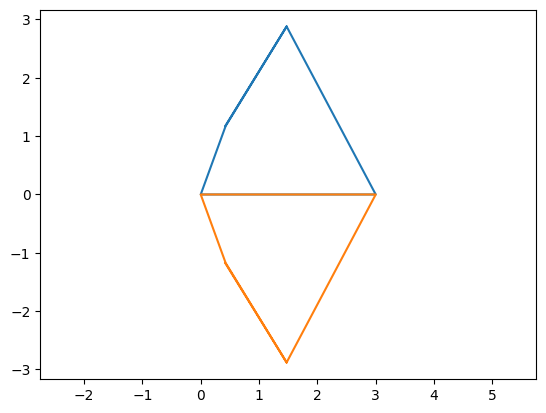

In [22]:
objective_function = gen_objective(design,70*pi/180)
result = so.minimize(objective_function,guess,options={'xrtol':1e-4})
plot_fourbar(design,result.x)

objective_function = gen_objective(design1,110*pi/180)
result1 = so.minimize(objective_function,guess,options={'xrtol':1e-4})
plot_fourbar(design1,result1.x)

[[ 2.16972409e-01  1.40259146e+00  3.00000000e+00  0.00000000e+00
   2.17214102e-01  1.40269651e+00]
 [ 1.23102703e+00  2.84171243e+00 -9.79028539e-05  0.00000000e+00
   1.23098255e+00  2.84176853e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 2.24556065e-01  1.40231820e+00  2.99999999e+00  0.00000000e+00
   2.16970667e-01  1.40249962e+00]
 [-1.22542131e+00 -2.84186071e+00 -2.03997727e-04  0.00000000e+00
  -1.23102548e+00 -2.84177720e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


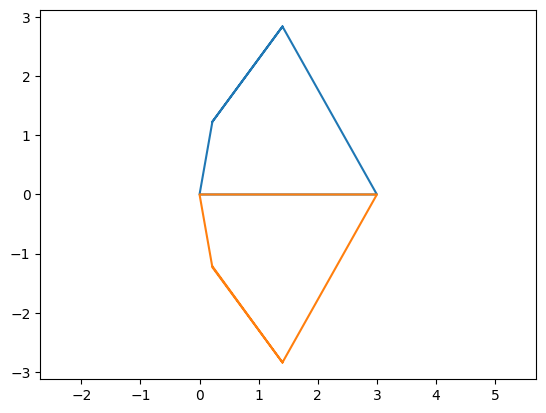

In [23]:
objective_function = gen_objective(design,80*pi/180)
result = so.minimize(objective_function,guess,options={'xrtol':1e-4})
plot_fourbar(design,result.x)

objective_function = gen_objective(design1,100*pi/180)
result1 = so.minimize(objective_function,guess,options={'xrtol':1e-4})
plot_fourbar(design1,result1.x)

In [24]:
zero1 = sympy.Matrix(zero)
zero1.simplify()
zero1

Matrix([
[-l_1*cos(\theta_1) - l_2*cos(\theta_1 + \theta_2) + l_3*cos(\theta_1 + \theta_4 + \theta_5) + l_4*cos(\theta_1 + \theta_4)],
[-l_1*sin(\theta_1) - l_2*sin(\theta_1 + \theta_2) + l_3*sin(\theta_1 + \theta_4 + \theta_5) + l_4*sin(\theta_1 + \theta_4)],
[                                                               l_3**2*(cos(\theta_2 + \theta_3 - \theta_4 - \theta_5) + 1)],
[                                                                                                                  \theta_1]])

In [25]:
independent = sympy.Matrix([q4])
dependent = sympy.Matrix([q1,q2,q3,q5])
zero_design = zero1.subs(design)

In [26]:
A = zero_design.jacobian(independent)
A

Matrix([
[-1.25*sin(\theta_1 + \theta_4) - 2*sin(\theta_1 + \theta_4 + \theta_5)],
[ 1.25*cos(\theta_1 + \theta_4) + 2*cos(\theta_1 + \theta_4 + \theta_5)],
[                      4*sin(\theta_2 + \theta_3 - \theta_4 - \theta_5)],
[                                                                     0]])

In [27]:
B = zero_design.jacobian(dependent)

In [28]:
state_variables = q1,q2,q3,q4,q5
state = dict(zip(state_variables,result.x))
An = numpy.array(A.subs(state),dtype=float)
An

array([[-2.84176853e+00],
       [ 1.40269651e+00],
       [ 3.39352237e-04],
       [ 0.00000000e+00]])

In [29]:
state1 = dict(zip(state_variables,result1.x))
An1 = numpy.array(A.subs(state1),dtype=float)
An1

array([[-2.8417772 ],
       [-1.40249962],
       [ 0.01925333],
       [ 0.        ]])

In [30]:
Bn = numpy.array(B.subs(state),dtype=float)
Bn

array([[-5.60951841e-05,  2.84181033e+00,  0.00000000e+00,
        -1.61078598e+00],
       [ 1.05041562e-04,  1.59740853e+00,  0.00000000e+00,
         1.18548240e+00],
       [ 0.00000000e+00, -3.39352237e-04, -3.39352237e-04,
         3.39352237e-04],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [31]:
Bn1 = numpy.array(B.subs(state1),dtype=float)
Bn1

array([[-3.24480656e-04,  2.84165672e+00,  0.00000000e+00,
        -1.61075172e+00],
       [-6.00018140e+00, -1.59768179e+00,  0.00000000e+00,
        -1.18552895e+00],
       [ 0.00000000e+00, -1.92533261e-02, -1.92533261e-02,
         1.92533261e-02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [32]:
Cn = -numpy.linalg.inv(Bn)@An
Cn

array([[ 0.        ],
       [ 0.18670866],
       [-0.62152245],
       [-1.43481379]])

In [33]:
Cn1 = -numpy.linalg.inv(Bn1)@An1
Cn1

array([[-1.30774120e-16],
       [ 1.86783557e-01],
       [-6.21518917e-01],
       [-1.43473536e+00]])

In [34]:
p_out = v4_in_n + .5*v5_in_n
p_out

Matrix([
[-l_4*sin(\theta_1)*sin(\theta_4) + l_4*cos(\theta_1)*cos(\theta_4) + 0.5*(-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*cos(\theta_1) - 0.5*(l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*sin(\theta_1)],
[ l_4*sin(\theta_1)*cos(\theta_4) + l_4*sin(\theta_4)*cos(\theta_1) + 0.5*(-l_3*sin(\theta_4)*sin(\theta_5) + l_3*cos(\theta_4)*cos(\theta_5))*sin(\theta_1) + 0.5*(l_3*sin(\theta_4)*cos(\theta_5) + l_3*sin(\theta_5)*cos(\theta_4))*cos(\theta_1)],
[                                                                                                                                                                                                                                                  0]])

In [35]:
D = p_out.jacobian(independent)
Dn = numpy.array(D.subs(design).subs(state),dtype=float)
E = p_out.jacobian(dependent)
En = numpy.array(E.subs(design).subs(state),dtype=float)
Jo = Dn+(En@Cn)
Jo

array([[-0.88078657],
       [-0.04051795],
       [ 0.        ]])

In [36]:
D1 = p_out.jacobian(independent)
Dn1 = numpy.array(D.subs(design1).subs(state1),dtype=float)
E1 = p_out.jacobian(dependent)
En1 = numpy.array(E.subs(design1).subs(state1),dtype=float)
Jo1 = Dn1+(En1@Cn1)
Jo1

array([[ 0.88090011],
       [-0.04072501],
       [ 0.        ]])

In [37]:
y_dot = Jo@numpy.array([[1,]]).T
y_dot

array([[-0.88078657],
       [-0.04051795],
       [ 0.        ]])

In [38]:
y_dot1 = Jo1@numpy.array([[1,]]).T
y_dot1

array([[ 0.88090011],
       [-0.04072501],
       [ 0.        ]])

In [39]:
p_out_n = numpy.array(p_out.subs(design).subs(state),dtype=float)
p_out_n

array([[0.8099553 ],
       [2.03637554],
       [0.        ]])

In [40]:
p_out_n1 = numpy.array(p_out.subs(design1).subs(state1),dtype=float)
p_out_n1

array([[ 0.80973514],
       [-2.03640134],
       [ 0.        ]])

[[ 2.16972409e-01  1.40259146e+00  3.00000000e+00  0.00000000e+00
   2.17214102e-01  1.40269651e+00]
 [ 1.23102703e+00  2.84171243e+00 -9.79028539e-05  0.00000000e+00
   1.23098255e+00  2.84176853e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 2.24556065e-01  1.40231820e+00  2.99999999e+00  0.00000000e+00
   2.16970667e-01  1.40249962e+00]
 [-1.22542131e+00 -2.84186071e+00 -2.03997727e-04  0.00000000e+00
  -1.23102548e+00 -2.84177720e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


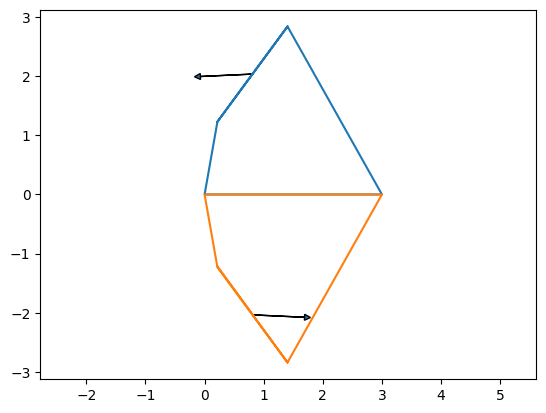

In [41]:
plot_fourbar(design,result.x)
plt.arrow(p_out_n[0,0],p_out_n[1,0],y_dot[0,0],y_dot[1,0],
            shape='full',head_width=.1,head_length=.1)

plot_fourbar(design1,result1.x)
plt.arrow(p_out_n1[0,0],p_out_n1[1,0],y_dot1[0,0],y_dot1[1,0],
            shape='full',head_width=.1,head_length=.1)